In [85]:
import pandas as pd
import numpy as np


data=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Maching Learning & AI/Individual Assignment/jewelry_customers.csv')

data.head()
data.tail()
data.describe()



,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [86]:
pd.isna(data).sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [87]:
data1=data.iloc[:,1:3].values

In [88]:
np.random.seed(40)

from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='ward')

model=model.fit(data1)

In [89]:
model.n_clusters_


505

In [91]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy


z=hierarchy.linkage(model.children_,'average')

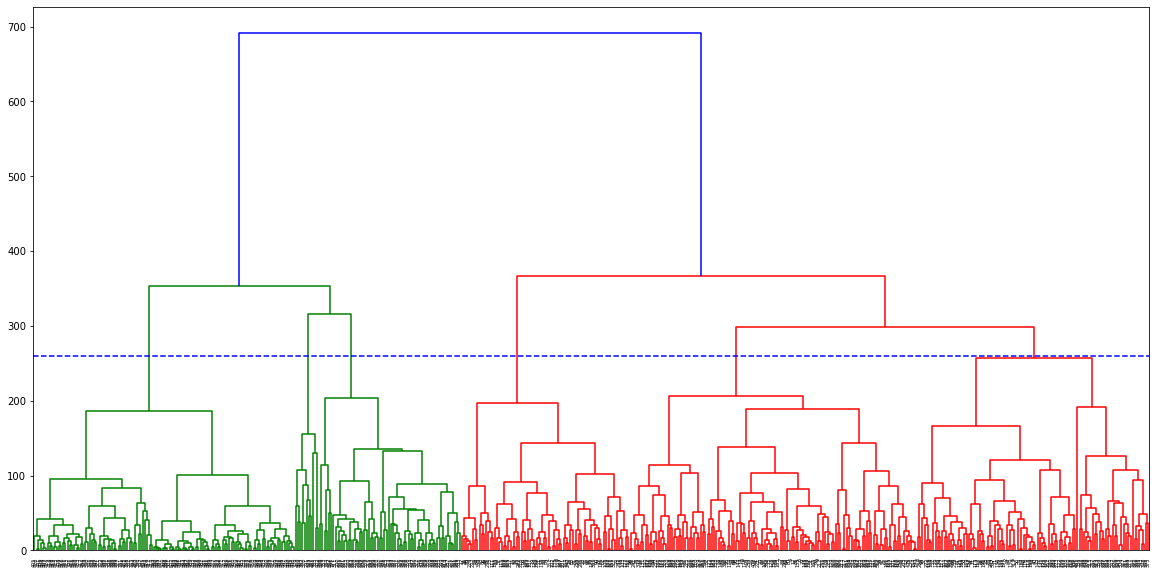

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

dn=dendrogram(z)

plt.axhline(c='blue',linestyle='--', y=260) 

plt.show()

In [93]:
np.random.seed(40)

from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(distance_threshold=None,n_clusters=5,linkage='ward')

model=model.fit(data1)

In [94]:
model.labels_

array([3, 3, 3, 3, 0, 2, 3, 0, 0, 0, 1, 1, 1, 1, 4, 2, 4, 0, 0, 2, 1, 2,
       3, 0, 2, 2, 2, 3, 0, 3, 4, 4, 0, 4, 1, 3, 0, 4, 1, 1, 4, 0, 2, 3,
       3, 2, 2, 2, 1, 3, 0, 1, 2, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4,
       0, 2, 2, 4, 3, 1, 0, 0, 1, 3, 1, 3, 3, 2, 3, 2, 3, 0, 0, 1, 1, 4,
       3, 3, 4, 3, 2, 0, 4, 2, 1, 3, 3, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 3,
       0, 1, 4, 1, 1, 1, 3, 1, 2, 0, 1, 0, 0, 0, 1, 2, 4, 0, 4, 4, 1, 4,
       1, 4, 2, 0, 2, 2, 4, 1, 0, 3, 3, 2, 3, 2, 4, 2, 4, 0, 4, 1, 0, 4,
       0, 2, 1, 3, 0, 4, 1, 0, 3, 1, 0, 1, 0, 3, 1, 4, 0, 4, 1, 4, 0, 3,
       4, 0, 0, 0, 4, 3, 1, 2, 2, 0, 1, 4, 3, 4, 1, 0, 4, 4, 3, 0, 2, 1,
       0, 0, 0, 1, 3, 1, 3, 1, 4, 0, 2, 4, 0, 0, 0, 0, 4, 0, 1, 2, 1, 0,
       3, 4, 1, 0, 2, 2, 1, 4, 3, 0, 4, 3, 0, 4, 3, 4, 1, 4, 2, 1, 2, 4,
       3, 4, 2, 3, 1, 0, 2, 2, 2, 0, 3, 1, 0, 0, 1, 2, 4, 3, 2, 4, 3, 0,
       3, 0, 1, 2, 4, 1, 0, 3, 0, 0, 1, 3, 0, 0, 4, 4, 0, 1, 1, 2, 1, 0,
       0, 3, 2, 0, 0, 2, 3, 1, 1, 3, 1, 0, 0, 1, 4,

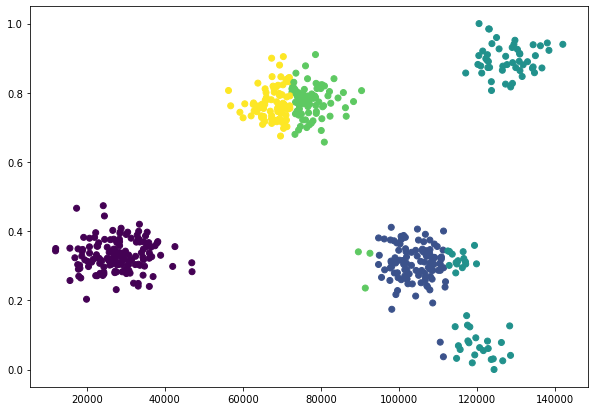

In [95]:
plt.figure(figsize=(10, 7))
plt.scatter(data1[:,0], data1[:,1], c=model.labels_)


In [96]:
for label in set(model.labels_):
    print('\nCluster{}:'.format(label))
    
    print(data[model.labels_==label].describe())
    


Cluster0:
              Age        Income  SpendingScore       Savings
count  147.000000    147.000000     147.000000    147.000000
mean    87.775510  27866.102041       0.328800  16659.261445
std      3.508885   6448.805481       0.045224   1183.850178
min     79.000000  12000.000000       0.203140  13470.970605
25%     85.000000  23361.000000       0.301502  15957.282919
50%     88.000000  27771.000000       0.324719  16711.067980
75%     91.000000  32601.000000       0.357267  17433.126684
max     97.000000  46977.000000       0.473550  20000.000000

Cluster1:
              Age         Income  SpendingScore       Savings
count  110.000000     110.000000     110.000000    110.000000
mean    33.645455  104345.590909       0.304474  15052.407181
std      7.901441    4618.689852       0.058183   1059.574578
min     22.000000   94762.000000       0.036795  12207.526078
25%     30.000000  100609.250000       0.275447  14337.879476
50%     33.000000  105021.000000       0.308421  15032.13

In [97]:
data.iloc[model.labels_==4,:]

,Age,Income,SpendingScore,Savings
14,61,71933,0.844107,8022.208541
16,55,71621,0.753343,7780.589914
30,59,65700,0.811471,6932.487932
31,59,69738,0.742112,7151.650866
33,56,63866,0.761888,7762.255067
...,...,...,...,...
474,62,67731,0.819170,5956.555677
478,65,70430,0.696994,6971.164886
479,59,69408,0.879906,6491.771150
480,65,71229,0.787890,9024.337461
